In [44]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

from utils.load_data import alldat, pre_process, comp_avg_signal
from utils.algo import sliding_window

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
filter_overt = pre_process(subj=0, exp=0, hpf=50)
filter_imag = pre_process(subj=0, exp=1, hpf=50)
sample_overt = comp_avg_signal(filter_overt, [500, 1500], 'hand')
sample_imag = comp_avg_signal(filter_imag, [500, 1500], 'hand')
signals = {'overt': sample_overt, 'imag': sample_imag}

In [66]:
def prepare_data(data, cv, **window_kwargs):
    """
    data: dictionary of shape: 
            {'overt': overt_data, 'imag': imag_data}
    cv: % test data
    labels: 0 is overt, 1 imag
    """
    _label_map = {'overt':0,'imag':1}
    all_features = []
    all_labels = []
    for chan in range(46):
        for k in signals.keys():
            windows = sliding_window(signals[k][:,chan], **window_kwargs)
            [all_features.append(w) for w in windows]
            [all_labels.append(_label_map[k]) for i in range(len(windows))]
    if cv:
        X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=cv)
        return X_train, X_test, y_train, y_test
    else:
        return all_features, all_labels

X_train, X_test, y_train, y_test =  prepare_data(signals, 0.1, win=int(250))
X, y =  prepare_data(signals, None, win=int(250))

In [70]:
for w in np.arange(50,1000, 50):
    try:
        X, y =  prepare_data(signals, None, win=int(w))
        print(w, cross_val_score(clf, X, y, cv=5, scoring='recall_macro').mean(0))
    except: pass

50 0.6777931034482758
100 0.6917866588304438
150 0.7282608695652174
200 0.7277777777777777
250 0.7772486772486772
300 0.793859649122807
350 0.7588888888888888
400 0.77
450 0.77
500 0.7622222222222221


In [67]:
clf = svm.SVC()
clf.fit(X_train, y_train)


scores = cross_val_score(clf, X, y, cv=5, scoring='recall_macro')
scores.mean(0)

0.7772486772486772

In [45]:
conf_mat =  confusion_matrix(clf.predict(X_test), y_test)

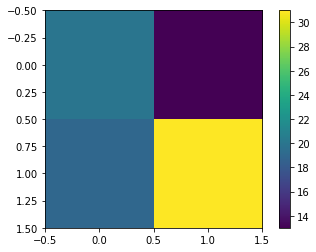

In [47]:
plt.imshow(conf_mat);
plt.colorbar()

In [48]:
conf_mat

array([[20, 13],
       [19, 31]])

In [7]:
sample_overt.shape

(9960, 46)

In [41]:
sample_imag.shape


(9960, 46)